In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nelgiriyewithana/global-weather-repository")

print("Dataset downloaded to:", path)

c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 2.83M/2.83M [00:01<00:00, 2.05MB/s]

Extracting model files...


Dataset downloaded to: C:\Users\nurka\.cache\kagglehub\datasets\nelgiriyewithana\global-weather-repository\versions\418


In [3]:
df = pd.read_csv(path + '/GlobalWeatherRepository.csv')

df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [5]:
selected = ['temperature_celsius', 'condition_text', 'wind_kph', 'wind_degree', 'pressure_in', 'precip_in', 'humidity', 'cloud', 'uv_index']

training = df[selected]

training.head(5)

,temperature_celsius,condition_text,wind_kph,wind_degree,pressure_in,precip_in,humidity,cloud,uv_index
0,26.6,Partly Cloudy,13.3,338,29.89,0.00,24,30,7.0
1,19.0,Partly cloudy,11.2,320,29.88,0.00,94,75,5.0
2,23.0,Sunny,15.1,280,29.85,0.00,29,0,5.0
3,6.3,Light drizzle,11.9,215,29.75,0.01,61,100,2.0
4,26.0,Partly cloudy,13.0,150,29.85,0.00,89,50,8.0


In [6]:
x_feat = [col for col in training.columns if col != 'condition_text']

X = training[x_feat]
y = training['condition_text']

In [7]:
y = y.str.lower()

y.unique()

array(['partly cloudy', 'sunny', 'light drizzle', 'clear', 'overcast',
       'moderate or heavy rain with thunder',
       'patchy light rain in area with thunder', 'fog',
       'patchy light rain with thunder', 'patchy rain nearby',
       'light rain', 'mist', 'cloudy', 'thundery outbreaks in nearby',
       'moderate rain', 'light rain shower', 'moderate rain at times',
       'moderate or heavy rain shower', 'heavy rain at times',
       'patchy light rain', 'patchy light drizzle',
       'thundery outbreaks possible', 'patchy rain possible',
       'moderate or heavy rain in area with thunder', 'heavy rain',
       'torrential rain shower', 'freezing fog',
       'moderate or heavy snow showers', 'light sleet', 'blizzard',
       'moderate snow', 'light snow', 'light sleet showers',
       'light freezing rain', 'heavy snow', 'blowing snow',
       'patchy heavy snow', 'light snow showers',
       'moderate or heavy sleet', 'patchy light snow'], dtype=object)

In [8]:
import requests

response = requests.get("https://www.weatherapi.com/docs/weather_conditions.json")

label = pd.DataFrame(response.json())

In [9]:
label_select_dict = {}

for index, row in label.iterrows():
    label_select_dict[row['night'].lower()] = row['code']
    label_select_dict[row['day'].lower()] = row['code']

y_encode = y.map(label_select_dict)

In [10]:
weather_mapping = {
    'Clear': [1000],
    'Cloudy': [1003, 1006, 1009],
    'Drizzle': [1150, 1153, 1168, 1171, 1180],
    'Rain': [1063, 1183, 1186, 1189, 1192, 1195, 1240, 1243, 1246],
    'Storm/Thunder': [1087, 1273, 1276, 1279, 1282],
    'Snow': [1066, 1210, 1213, 1216, 1219, 1222, 1225, 1255, 1258],
    'Sleet': [1069, 1072, 1204, 1207, 1249, 1252],
    'Fog': [1030, 1135, 1147],
    'Extreme Weather': [1114, 1117, 1237]
}

flat_mapping = {code: category for category, codes in weather_mapping.items() for code in codes}

y_encode_transform = y_encode.map(flat_mapping)

In [11]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y_encode_transform)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size=.1, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((33528, 8), (3726, 8), (33528,), (3726,))

In [13]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_train_scaled = scaler.fit_transform(x_train)
# x_test_scaled = scaler.transform(x_test)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [176]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(np.unique(y_encoded)), activation='softmax'),    
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [177]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_121 (Dense)           (None, 256)               2304      
                                                                 
 batch_normalization_50 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_122 (Dense)           (None, 128)               32896     
                                                                 
 batch_normalization_51 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_123 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_52 (Bat  (None, 64)             

In [178]:
history = model.fit(x_train_scaled, y_train, batch_size=32, epochs=50, validation_data=(x_test_scaled, y_test), verbose=1)

Epoch 1/50
1048/1048 [==============================] - 7s 3ms/step - loss: 1.5458 - accuracy: 0.7388 - val_loss: 0.7845 - val_accuracy: 0.7845
Epoch 2/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.7229 - accuracy: 0.7865 - val_loss: 0.6428 - val_accuracy: 0.8014
Epoch 3/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.6526 - accuracy: 0.7954 - val_loss: 0.6212 - val_accuracy: 0.7995
Epoch 4/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.6168 - accuracy: 0.8041 - val_loss: 0.6119 - val_accuracy: 0.8043
Epoch 5/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.6013 - accuracy: 0.8060 - val_loss: 0.6076 - val_accuracy: 0.8017
Epoch 6/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.5858 - accuracy: 0.8113 - val_loss: 0.5653 - val_accuracy: 0.8167
Epoch 7/50
1048/1048 [==============================] - 3s 3ms/step - loss: 0.5778 - accuracy: 0.8119 - val_loss: 0.5514 - val_accuracy:

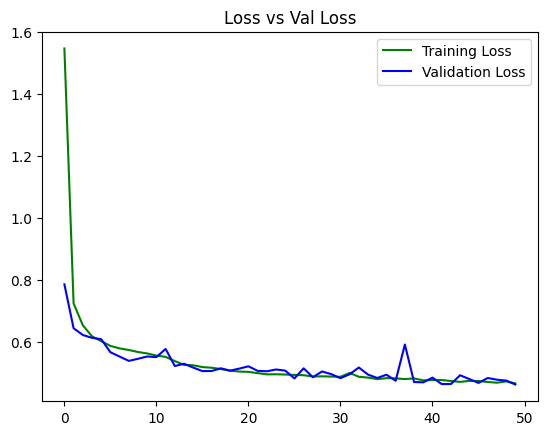

In [179]:
plt.plot(history.history['loss'], color='g', label='Training Loss')
plt.plot(history.history['val_loss'], color='b', label='Validation Loss')
plt.title("Loss vs Val Loss")
plt.legend()
plt.show()

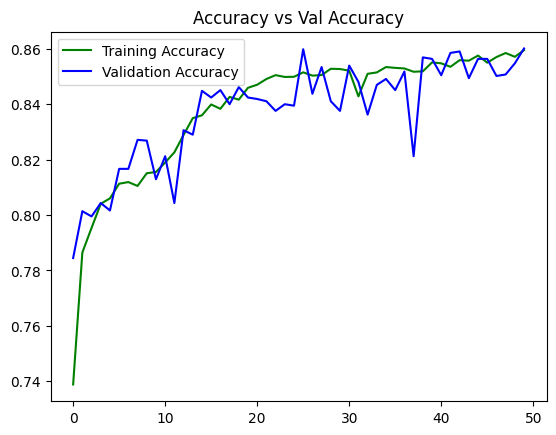

In [180]:
plt.plot(history.history['accuracy'], color='g', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.title("Accuracy vs Val Accuracy")
plt.legend()
plt.show()

In [181]:
from sklearn.metrics import classification_report

y_pred = np.argmax(model.predict(x_test_scaled), axis=1)
print(classification_report(y_test, y_pred))

117/117 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1342
           1       0.82      0.94      0.88      1565
           2       0.00      0.00      0.00        40
           3       0.00      0.00      0.00         1
           4       0.76      0.38      0.51       115
           5       0.60      0.47      0.53       285
           7       0.67      0.40      0.50         5
           8       0.00      0.00      0.00        59
           9       0.76      0.70      0.73       314

    accuracy                           0.86      3726
   macro avg       0.51      0.43      0.46      3726
weighted avg       0.83      0.86      0.84      3726



c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nurka\.conda\envs\Tensor\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
# model.save('classification.h5')